In [683]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set display options
pd.set_option('display.max_columns', None)

In [684]:
# import dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

/Users/brandonryu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [685]:
# real_estate.Neighborhood.value_counts()
# real_estate

## Pre-Processing Data

### 1. Missing Data

In [686]:
# Alley : data description says NA means "no alley access"
housing.Alley.fillna("None", inplace=True)
# BedroomAbvGr : NA most likely means 0
housing.BedroomAbvGr.fillna(0,inplace=True)
# BsmtQual etc : data description says NA for basement features is "no basement"
housing.BsmtQual.fillna(0, inplace=True)
housing.BsmtCond.fillna(0, inplace=True)
housing.BsmtExposure.fillna('No', inplace=True)
housing.BsmtFinType1.fillna(0, inplace=True)
housing.BsmtFinType2.fillna(0, inplace=True)
housing.BsmtFullBath.fillna(0, inplace=True)
housing.BsmtHalfBath.fillna(0, inplace=True)
housing.BsmtUnfSF.fillna(0, inplace=True)
# CentralAir : NA most likely means No
housing.CentralAir.fillna("N", inplace=True)
# Condition : NA most likely means Normal
housing.Condition1.fillna("Norm", inplace=True)
housing.Condition2.fillna("Norm", inplace=True)
# EnclosedPorch : NA most likely means no enclosed porch
housing.EnclosedPorch.fillna(0, inplace=True)
# External stuff : NA most likely means average
housing.ExterCond.fillna("TA", inplace=True)
housing.ExterQual.fillna("TA", inplace=True)
# Fence : data description says NA means "no fence"
housing.Fence.fillna("No", inplace=True)
# FireplaceQu : data description says NA means "no fireplace"
housing.Fireplaces.fillna(0, inplace=True)
# Functional : data description says NA means typical
housing.Functional.fillna("Typ", inplace=True)
# GarageType etc : data description says NA for garage features is "no garage"
housing.GarageType.fillna("No", inplace=True)
housing.GarageFinish.fillna("No", inplace=True)
housing.GarageQual.fillna("No", inplace=True)
housing.GarageCond.fillna("No", inplace=True)
housing.GarageArea.fillna(0, inplace=True)
housing.GarageCars.fillna(0, inplace=True)
# HalfBath : NA most likely means no half baths above grade
housing.HalfBath.fillna(0, inplace=True)
# HeatingQC : NA most likely means typical
housing.HeatingQC.fillna("TA", inplace=True)
# KitchenAbvGr : NA most likely means 0
housing.KitchenAbvGr.fillna(0, inplace=True)
# KitchenQual : NA most likely means typical
housing.KitchenQual.fillna("TA", inplace=True)
# LotFrontage : NA most likely means no lot frontage
housing.LotFrontage.fillna(0, inplace=True)
# LotShape : NA most likely means regular
housing.LotShape.fillna("Reg", inplace=True)
# MasVnrType : NA most likely means no veneer
housing.MasVnrType.fillna("None", inplace=True)
housing.MasVnrArea.fillna(0, inplace=True)
# MiscFeature : data description says NA means "no misc feature"
housing.MiscFeature.fillna("No", inplace=True)
housing.MiscVal.fillna(0, inplace=True)
# OpenPorchSF : NA most likely means no open porch
housing.OpenPorchSF.fillna(0, inplace=True)
# PavedDrive : NA most likely means not paved
housing.PavedDrive.fillna("N", inplace=True)
# PoolQC : data description says NA means "no pool"
housing.PoolArea.fillna(0, inplace=True)
# SaleCondition : NA most likely means normal sale
housing.SaleCondition.fillna("Normal", inplace=True)
# ScreenPorch : NA most likely means no screen porch
housing.ScreenPorch.fillna(0, inplace=True)
# TotRmsAbvGrd : NA most likely means 0
housing.TotRmsAbvGrd.fillna(0, inplace=True)
# Utilities : NA most likely means all public utilities
housing.Utilities.fillna("AllPub", inplace=True)
# WoodDeckSF : NA most likely means no wood deck
housing.WoodDeckSF.fillna(0, inplace=True)

In [687]:
housing.drop(columns='GarageYrBlt', inplace=True)

### 2. Feature Transformation

In [688]:
# Change ordinal PoolQC column into 0~4 in increasing quality
housing.PoolQC.fillna(0, inplace=True)
housing.PoolQC = housing.PoolQC.replace({"Fa":1, "TA":2, "Gd":3,"Ex":4})

In [689]:
# Change ordinal FireplaceQu column into 0~5 in increasing quality
housing.FireplaceQu.fillna(0, inplace=True)
housing.FireplaceQu = housing.FireplaceQu.replace({"Po":1, "Fa":2,'Ta':3, "Gd":4,"Ex":5})

In [690]:
# Create Shed and Gar2 (bool)columns from MiscFeature column. Drop MiscFeature column
housing['Shed'] = housing.MiscFeature=='Shed'
housing.Shed = housing.Shed.astype(int)

housing['Gar2'] = housing.MiscFeature=='Gar2'
housing.Gar2 = housing.Gar2.astype(int)

housing.drop(columns='MiscFeature', inplace=True)

In [691]:
# Change ordinal Fence column into 0~4 in increasing quality
housing.Fence.fillna(0, inplace=True)
housing.Fence = housing.Fence.replace({'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [692]:
# Fill missing LotFrontage values with 0
housing.LotFrontage.fillna(0, inplace=True)

In [693]:
# # Change ordinal GarageCond, GarageQual, GarageFinish column into 0~5 in increasing quality
# housing.GarageCond.fillna(0, inplace=True)
# housing.GarageCond = housing.GarageCond.replace({'Po':1,'Fa':2,'TA':3, 'Gd':4, 'Ex':5})

# housing.GarageQual.fillna(0, inplace=True)
# housing.GarageQual = housing.GarageQual.replace({'Po':1,'Fa':2, 'TA':'3','Gd':4,'Ex':5})

# housing.GarageFinish.fillna(0, inplace=True)
# housing.GarageFinish = housing.GarageFinish.replace({'Unf':1,'Rfn':2, 'Fin':3})

In [694]:
# Dummify Alley and garage type columns
# housing = pd.get_dummies(housing, columns=['GarageType','Alley'])

In [695]:
# change utilities to 0 and 1
housing.Utilities = housing.Utilities.replace({'AllPub':1,'NoSewr':0})

In [696]:
# Condition 1 and 2
housing.Condition1 = housing.Condition1.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})
housing.Condition2 = housing.Condition2.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})

In [697]:
# Change BldgType to ordinal based on price
housing.BldgType = housing.BldgType.replace({'2fmCon':1,'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE':5})

In [698]:
# Change HouseStyle to ordinal based on price
housing.HouseStyle = housing.HouseStyle.replace({'1.5Unf':1,'1.5Fin':2, 'SFoyer':3, 'SLvl':4, '1Story':5, '2.5Unf':6, '2Story':7, '2.5Fin':8})

In [703]:
housing['GarageCars'].max()

5.0

In [664]:
# Change Neighborhood to ordinal based on price
housing.Neighborhood = housing.Neighborhood.replace({'MeadowV':1,'BrDale':2, 'IDOTRR':3, 'BrkSide':4, 'OldTown':5, 'Edwards':6, 'SWISU':7, 'Landmrk':8, 'Sawyer':9,\
                           'NPkVill':10, 'Blueste':11, 'NAmes':12, 'Mitchel':13, 'SawyerW':14, 'Gilbert':15, 'NWAmes':16, 'Greens':17, 'Blmngtn':18,\
                           'CollgCr':19, 'Crawfor':20, 'ClearCr':21, 'Somerst':22, 'Timber':23, 'Veenker':24, 'GrnHill':25, 'StoneBr':26,'NridgHt':27, 'NoRidge':28})

In [665]:
# Change Alley to ordinal based on price
housing.Alley = housing.Alley.replace({'Grvl':1,'Pave':2,'None':3})

In [666]:
# Combine porch areas into 1 column. drop columns that we dont use
housing['GrPorchArea']=housing['OpenPorchSF']+housing['EnclosedPorch']+housing['3SsnPorch'] + housing['ScreenPorch']
housing.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

In [667]:
# Transform Pool Area to yes/no column
housing['Pool_YN']=housing.PoolArea.apply(lambda x: 1 if x>0 else(0))
housing.drop(columns='PoolArea',inplace=True)

In [668]:
# drop na values
housing.dropna(subset=['GarageCars','GarageArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','Electrical'],inplace=True)

In [669]:
# real_estate.head(10)
housing.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Shed,Gar2,GrPorchArea,Pool_YN
1,909176150,856,126000,30,RL,0.0,7890,Pave,3,Reg,Lvl,1,Corner,Gtl,7,1,1,4,5,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,4,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,No,0,3,2010,WD,Normal,0,0,166,0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,3,Reg,Lvl,1,Inside,Gtl,6,1,1,5,5,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,Fin,1.0,266.0,TA,TA,Y,0,0,No,0,2,2009,WD,Normal,0,0,105,0
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,3,Reg,Lvl,1,Inside,Gtl,3,1,1,4,5,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,No,0,11,2007,WD,Normal,0,0,128,0
4,535377150,1039,114000,70,RL,80.0,8146,Pave,3,Reg,Lvl,1,Corner,Gtl,5,1,1,4,7,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,No,0,5,2009,WD,Normal,0,0,279,0
5,534177230,1665,227000,60,RL,70.0,8400,Pave,3,Reg,Lvl,1,Inside,Gtl,16,1,1,4,7,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,Fin,2.0,528.0,TA,TA,Y,0,0,No,0,11,2009,WD,Normal,0,0,45,0
6,908128060,1922,198500,85,RL,64.0,7301,Pave,3,Reg,Lvl,1,Corner,Gtl,6,1,1,4,3,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,0,0,No,0,0.0,0,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,5,BuiltIn,RFn,2.0,672.0,TA,TA,Y,0,0,No,0,7,2009,ConLD,Normal,0,0,177,0
7,902135020,936,93000,20,RM,60.0,6000,Pave,2,Reg,Bnk,1,Inside,Mod,5,1,1,1,5,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,0,Detchd,Unf,2.0,576.0,TA,TA,Y,0,0,No,0,2,2009,WD,Normal,0,0,144,0
8,528228540,1246,187687,20,RL,53.0,3710,Pave,3,Reg,Lvl,1,Inside,Gtl,18,1,1,4,5,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,4,Attchd,Fin,2.0,428.0,TA,TA,Y,100,0,No,0,3,2008,New,Partial,0,0,24,0
9,923426010,889,137500,20,RL,74.0,12395,Pave,3,Reg,Lvl,1,Corner,Gtl,13,1,1,4,5,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,0,Attchd,Unf,2.0,484.0,TA,TA,Y,0,0,No,0,4,2008,WD,Normal,0,0,0,0
10,908186050,1072,140000,180,RM,35.0,3675,Pave,3,Reg,Lvl,1,Inside,Gtl,6,1,1,5,3,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,TA,TA,PConc,Gd,TA,Gd,GLQ,467.0,Unf,0.0,80.0,547.0,GasA,Ex,Y,SBrkr,1072,0,0,1.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Basment,Fin,2.0,525.0,TA,TA,Y,0,0,No,0,5,2007,WD,Normal,0,0,44,0


### Check Missing Values after preprocessing

In [670]:
# pd.DataFrame(housing.columns).set_index(0)
missing = pd.DataFrame(housing.isna().sum(axis=0)).rename(columns={0:'count'})
missing[missing['count'] > 0].sort_values(by='count', ascending=False)

,count


Neighborhood
1      96836.470588
2     106094.827586
3     108102.947368
4     126490.931373
5     126939.018779
6     133152.248485
7     133575.809524
8     137000.000000
9     137492.863309
10    140743.181818
11    143590.000000
12    145087.258537
13    162655.288462
14    188102.000000
15    189439.867133
16    190372.398374
17    193531.250000
18    196237.173913
19    198133.169492
20    201988.946237
21    213980.800000
22    228761.853147
23    244332.339623
24    251263.043478
25    280000.000000
26    305307.930233
27    313662.495868
28    326114.298507
Name: SalePrice, dtype: float64

## EDA

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

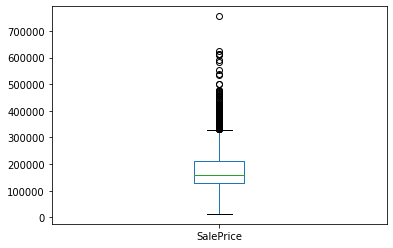

In [27]:
housing.SalePrice.plot(kind='box')
housing.SalePrice.describe()

In [681]:
housing.GarageCars.describe()

count    2578.000000
mean        1.747091
std         0.739459
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

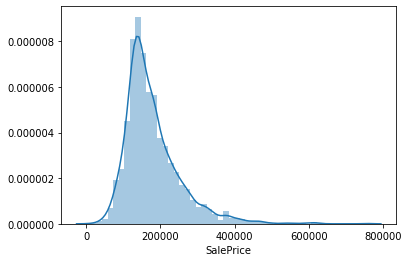

In [28]:
sns.distplot(housing.SalePrice)
# Sale price of houses in Ames are normally distributed with mean price around $178,000 and sd $75,000

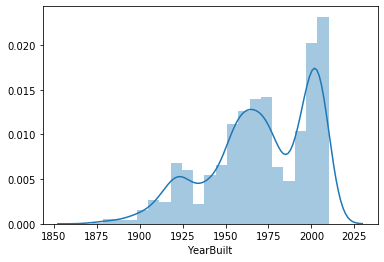

In [21]:
sns.distplot(housing.YearBuilt)
# YearBuilt of houses are not normally distributed. Local maximums around 1923, 1960, 2005.
# (every 40 years, a wave of new houses)

In [33]:
categorical = housing[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']]

In [32]:
continous = housing[['SalePrice','LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]

In [50]:
areas = housing[['SalePrice','GrLivArea','WoodDeckSF', 'GrPorchArea', 'GarageArea','Pool_YN']]

In [35]:
SalePrice = housing.SalePrice

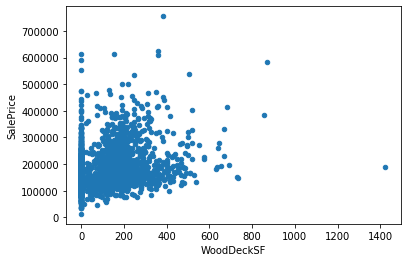

In [51]:
areas.plot(kind='scatter', x='WoodDeckSF', y='SalePrice')

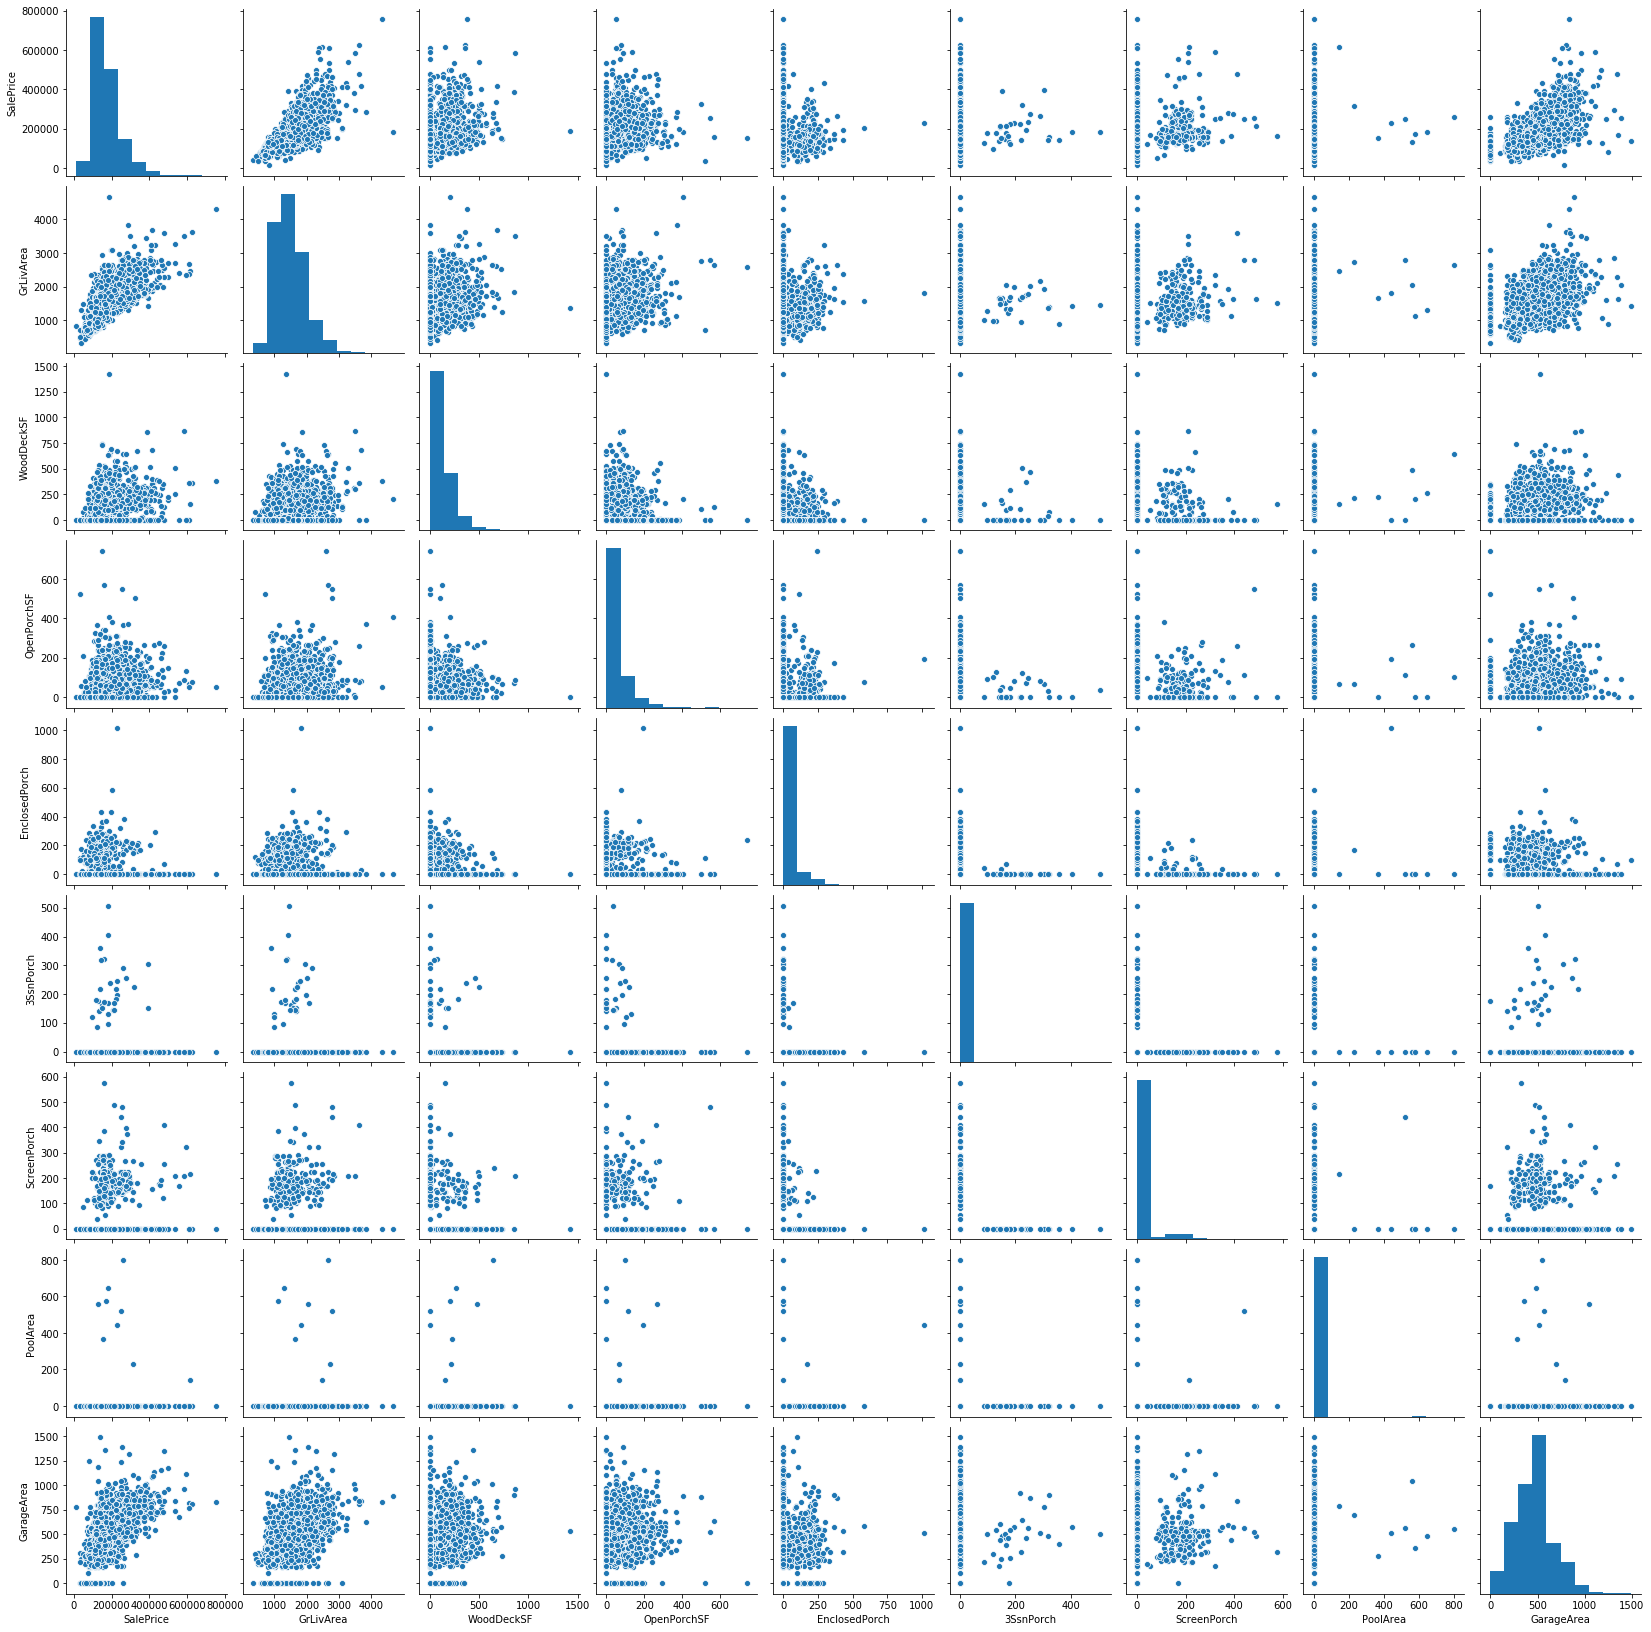

In [52]:
sns.pairplot(areas)

In [679]:
housing.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790397
GrLivArea       0.719807
Neighborhood    0.708895
TotalBsmtSF     0.652447
1stFlrSF        0.642626
GarageCars      0.638285
GarageArea      0.634520
YearBuilt       0.544426
FullBath        0.534869
YearRemodAdd    0.514102
MasVnrArea      0.498345
TotRmsAbvGrd    0.489857
Fireplaces      0.487987
BsmtFinSF1      0.460833
WoodDeckSF      0.333002
BsmtFullBath    0.290458
HalfBath        0.285771
LotArea         0.274285
HouseStyle      0.264129
2ndFlrSF        0.262924
Condition1      0.194207
GrPorchArea     0.186375
LotFrontage     0.177988
BldgType        0.168062
BsmtUnfSF       0.167504
BedroomAbvGr    0.151371
Alley           0.133548
Condition2      0.114957
PoolQC          0.083764
Pool_YN         0.061415
Utilities       0.034092
BsmtFinSF2      0.022503
MoSold          0.012161
YrSold         -0.001306
Gar2           -0.017982
MiscVal        -0.018939
LowQualFinSF   -0.030900
BsmtHalfBath   -0.033942
Shed           -0.054418


In [57]:
null_columns = housing.isnull().sum()
null_columns[null_columns>0]

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [53]:
areas['GrPorchArea']=areas['OpenPorchSF']+areas['EnclosedPorch']+areas['3SsnPorch'] + areas['ScreenPorch']

/Users/brandonryu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
areas.head()

,SalePrice,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,GarageArea,GrPorchArea
1,126000,856,0,0,0,0,166,0,399.0,166
2,139500,1049,0,105,0,0,0,0,266.0,105
3,124900,1001,154,0,42,86,0,0,216.0,128
4,114000,1039,0,0,168,0,111,0,281.0,279
5,227000,1665,0,45,0,0,0,0,528.0,45


In [58]:
gr_area = areas[['SalePrice','GrLivArea','WoodDeckSF','GarageArea','GrPorchArea']]

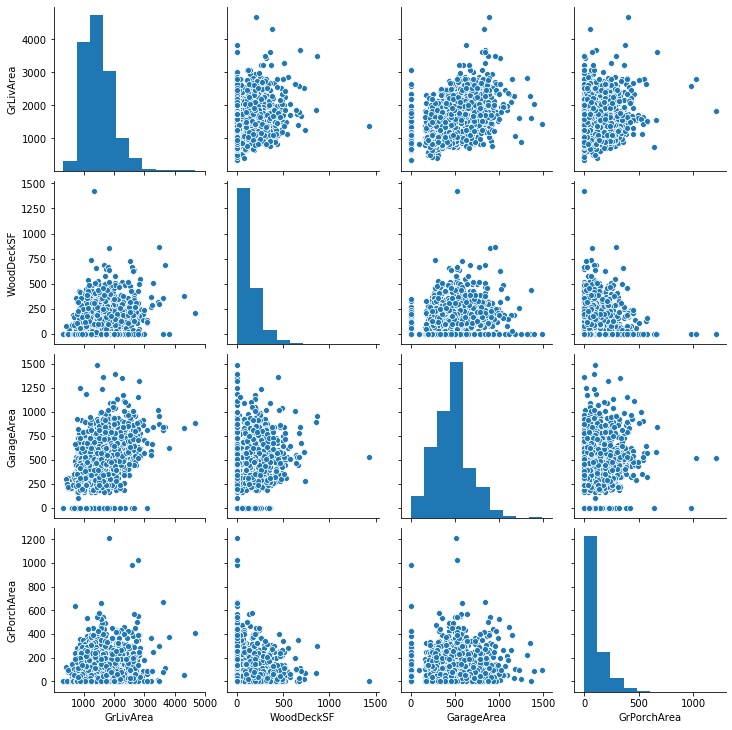

In [56]:
sns.pairplot(gr_area)

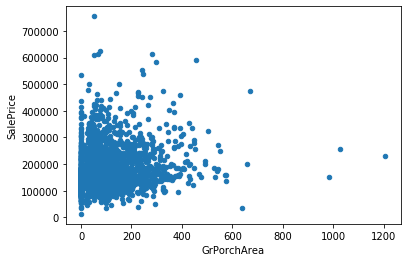

In [65]:
gr_area.plot(kind='scatter', x='GrPorchArea',y='SalePrice')

In [ ]:
housing.plot(kind='bar', x='HouseStyle')

In [602]:
# housing.HouseStyle.value_counts()

In [601]:
# housing.YrSold.value_counts()

In [600]:
# housing.SaleType.value_counts()

In [598]:
# housing.Neighborhood.value_counts()

In [599]:
# housing.BldgType.value_counts()

In [ ]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

In [81]:
housing.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,2fmCon,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,

* Which of the house styles, ranch or colonial, is more popular in terms of the house prices?

* What is the popularity in terms of the housing inventory (based on the available data)? 1 story vs 2 story??

* Does the house price sensitivity on 2ndFlrSF depend on the house style (1st story excluded)?

* Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s?

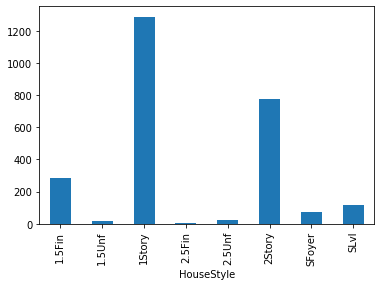

In [85]:
housing.groupby('HouseStyle')['PID'].count().plot(kind='bar')

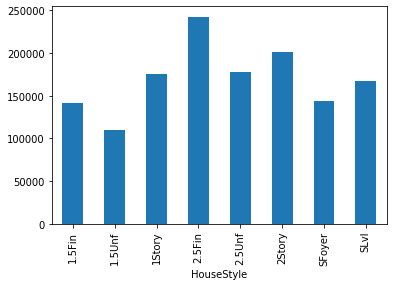

In [94]:
housing.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')

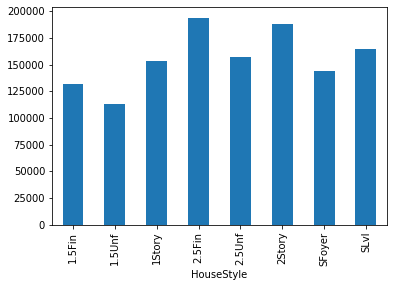

In [96]:
housing.groupby('HouseStyle')['SalePrice'].median().plot(kind='bar')

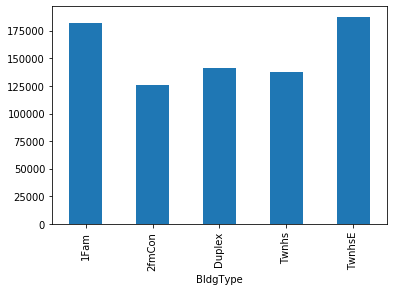

In [92]:
housing.groupby('BldgType')['SalePrice'].mean().plot(kind='bar')

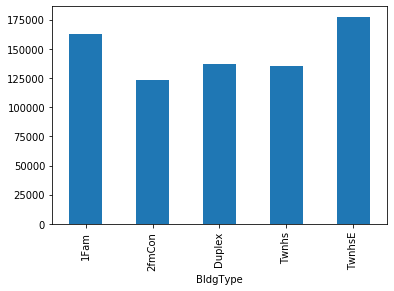

In [93]:
housing.groupby('BldgType')['SalePrice'].median().plot(kind='bar')

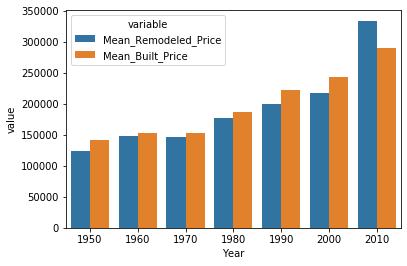

In [148]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].mean().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].mean().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Mean_Remodeled_Price','SalePrice_y':'Mean_Built_Price'})
remodel_built = pd.melt(remodel_built,id_vars=['Year'])
sns.barplot(data = remodel_built, x='Year', y='value', hue='variable')

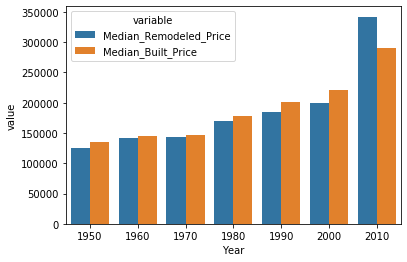

In [149]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].median().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].median().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Median_Remodeled_Price','SalePrice_y':'Median_Built_Price'})
remodel_built = pd.melt(remodel_built,id_vars=['Year'])
sns.barplot(data = remodel_built, x='Year', y='value', hue='variable')

In [150]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].median().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].median().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Median_Remodeled_Price','SalePrice_y':'Median_Built_Price'})

In [152]:
remodel_built['New-Remodeled']=remodel_built.Median_Built_Price - remodel_built.Median_Remodeled_Price

In [153]:
remodel_built

,Year,Median_Remodeled_Price,Median_Built_Price,New-Remodeled
0,1950,124750,135000,10250
1,1960,142175,145250,3075
2,1970,144000,147000,3000
3,1980,169000,178000,9000
4,1990,184950,201500,16550
5,2000,200000,221800,21800
6,2010,342096,290716,-51380


In [597]:
housing[housing.YearRemodAdd==2010]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,527258010,1856,394432,20,RL,88.0,11394,Pave,3,Reg,Lvl,AllPub,Corner,Gtl,26,1,1,4,5,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,No,No,No,0,6,2010,New,Partial
561,528108120,2334,376162,60,RL,102.0,12858,Pave,3,IR1,Lvl,AllPub,Inside,Gtl,27,1,1,4,7,9,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,162.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1590.0,1590.0,GasA,Ex,Y,SBrkr,1627,707,0,0.0,0.0,2,1,3,1,Ex,10,Typ,1,Gd,Attchd,Fin,3.0,751.0,TA,TA,Y,144,133,0,0,0,0,No,No,No,0,1,2010,New,Partial
585,528150070,2364,611657,20,RL,100.0,12919,Pave,3,IR1,Lvl,AllPub,Inside,Gtl,27,1,1,4,5,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,No,No,No,0,3,2010,New,Partial
692,905453080,1508,308030,20,RL,44.0,17485,Pave,3,IR2,Lvl,AllPub,Inside,Gtl,6,1,1,4,5,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,96.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1346.0,Unf,0.0,162.0,1508.0,GasA,Ex,Y,SBrkr,1508,0,0,1.0,0.0,1,0,1,1,Gd,5,Typ,2,TA,Attchd,RFn,2.0,572.0,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,1,2010,Con,Partial
373,906385020,1222,187000,20,RL,64.0,7360,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,19,1,1,4,5,7,5,2010,2010,Gable,CompShg,VinylSd,VinylSd,Stone,80.0,Gd,TA,PConc,Gd,TA,No,GLQ,24.0,Unf,0.0,1198.0,1222.0,GasA,Ex,Y,SBrkr,1222,0,0,0.0,0.0,2,0,2,1,Gd,6,Typ,0,No,Attchd,RFn,2.0,615.0,TA,TA,Y,0,54,0,0,0,0,No,No,No,0,3,2010,WD,Normal
635,532378110,1040,127000,20,RL,0.0,6897,Pave,3,IR1,Lvl,AllPub,Corner,Gtl,9,1,1,4,5,5,8,1962,2010,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,659.0,Unf,0.0,381.0,1040.0,GasA,Ex,Y,SBrkr,1040,0,0,1.0,0.0,1,1,3,1,TA,6,Typ,0,No,Detchd,Unf,1.0,260.0,TA,TA,Y,0,104,0,0,0,0,No,No,No,0,4,2010,WD,Normal


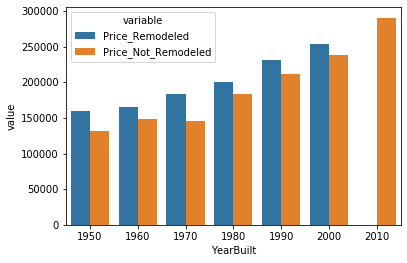

In [592]:
# how much does remodeling increase cost?
# look at average price per built decade without remodeling and compare with average price per built decade with remodeling
not_remodeled_price = housing[housing.YearRemodAdd==housing.YearBuilt].groupby((housing[housing.YearRemodAdd==housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodeled_price = housing[housing.YearRemodAdd!=housing.YearBuilt].groupby((housing[housing.YearRemodAdd!=housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'right', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})
remodel_and_not = pd.melt(remodel_and_not,id_vars=['YearBuilt'])
sns.barplot(data = remodel_and_not, x='YearBuilt', y='value', hue='variable')
# group into the year built

In [588]:
remodeled_price

,YearBuilt,SalePrice
0,1950,131559.128713
1,1960,148449.529880
2,1970,145995.785978
3,1980,183239.534884
4,1990,212223.500000
5,2000,237947.157635
6,2010,290716.000000


In [416]:
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'left', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})

In [419]:
remodel_and_not['Price_diff']=remodel_and_not.Price_Remodeled-remodel_and_not.Price_Not_Remodeled

In [420]:
remodel_and_not

,YearBuilt,Price_Remodeled,Price_Not_Remodeled,Price_diff
0,1950,131559.128713,159621.153846,-28062.025133
1,1960,148449.529880,165780.000000,-17330.470120
2,1970,145995.785978,183372.580645,-37376.794667
3,1980,183239.534884,199896.551724,-16657.016840
4,1990,212223.500000,231567.256410,-19343.756410
5,2000,237947.157635,254365.175879,-16418.018244
6,2010,290716.000000,NaN,NaN


### Looking at monthly trends on sale price

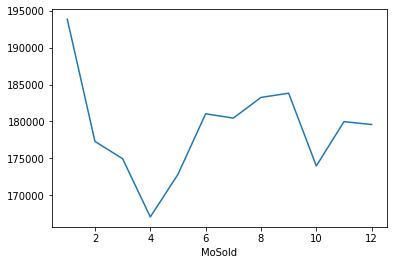

In [425]:
housing.groupby('MoSold').mean()['SalePrice'].plot()

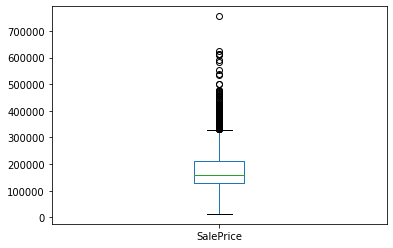

In [426]:
housing.plot(kind='box',x='MoSold',y='SalePrice')

## Modelling finally!!

## 1. Linear Models

In [203]:
lm_data = housing[['GrLivArea','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','GrPorchArea','WoodDeckSF']]
target = housing.SalePrice

In [538]:
lm_data.isna().sum(axis=0)

GrLivArea       0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
GrPorchArea     0
WoodDeckSF      0
dtype: int64

In [205]:
from sklearn import model_selection

In [206]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lm_data, target, test_size=.2, random_state=0)

In [207]:
from sklearn.linear_model import LinearRegression

In [209]:
lm = LinearRegression()
lm.fit(x_train,y_train)
print('train score',lm.score(x_train,y_train))
print('test score',lm.score(x_test,y_test))

train score 0.8485107795272177
test score 0.8589495358277834


In [213]:
lm.coef_
lm.intercept_

-1180309.7297446881

In [674]:
housing.groupby('Fireplaces').mean()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,Alley,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,PoolQC,MiscVal,MoSold,YrSold,Shed,Gar2,GrPorchArea,Pool_YN
Fireplaces,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.428045e+08,1259.638418,140678.805488,59.071832,54.850686,8662.004036,2.843422,0.999193,11.142857,0.866828,0.987086,3.793382,4.935432,5.445521,5.711864,1963.146893,1979.926554,53.583535,343.857143,49.664245,512.601291,906.122680,1000.888620,254.585149,4.164649,0.379338,0.054883,1.390638,0.270379,2.781275,1.071025,5.897498,1.472155,399.904762,64.661824,0.001614,60.958031,6.067797,2007.860371,0.039548,0.003228,69.178370,0.000807
1,6.820892e+08,1660.090989,206940.265901,57.685512,57.583922,10419.271201,2.939929,1.000000,16.254417,0.944346,1.001767,4.025618,5.389576,6.594523,5.485866,1978.654594,1988.373675,135.643993,493.004417,48.926678,587.643110,1129.574205,1241.122792,414.708481,4.259717,0.446996,0.067138,1.710247,0.472615,2.898410,1.007067,6.798587,2.001767,525.952297,123.703180,0.010601,33.613074,6.192580,2007.797703,0.026502,0.000883,99.886042,0.004417
2,7.306190e+08,1877.758974,243179.779487,49.358974,56.200000,17443.307692,2.943590,0.994872,16.189744,0.943590,1.005128,3.928205,5.174359,6.630769,5.810256,1967.312821,1981.353846,164.256410,778.738462,91.174359,435.487179,1305.400000,1471.994872,400.794872,4.969231,0.702564,0.071795,1.635897,0.507692,3.000000,1.041026,7.035897,1.989744,541.328205,129.158974,0.025641,62.307692,6.374359,2007.974359,0.046154,0.000000,133.589744,0.010256
3,6.344419e+08,2088.090909,264531.818182,50.000000,67.363636,13791.636364,3.000000,1.000000,18.909091,1.000000,1.000000,3.818182,5.636364,7.090909,5.454545,1971.090909,1983.363636,246.454545,815.636364,191.636364,407.818182,1415.090909,1649.454545,438.636364,0.000000,0.727273,0.000000,1.636364,0.545455,3.090909,1.000000,7.636364,2.181818,576.181818,127.090909,0.000000,0.000000,8.000000,2007.272727,0.000000,0.000000,194.181818,0.000000
4,5.324760e+08,2646.000000,260000.000000,80.000000,100.000000,14330.000000,3.000000,1.000000,24.000000,1.000000,1.000000,4.000000,4.000000,7.000000,4.000000,1974.000000,1974.000000,145.000000,1023.000000,497.000000,228.000000,1748.000000,2151.000000,495.000000,0.000000,1.000000,2.000000,2.000000,0.000000,3.000000,1.000000,9.000000,2.000000,550.000000,641.000000,3.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,100.000000,1.000000


## 2. Tree Based Models

In [568]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [563]:
# pick our features and target
X = housing[['GrLivArea',
           'MSSubClass',
           'LotFrontage',
           'LotArea',
           'Alley',
           'Neighborhood',
           'Condition1',
           'Condition2',
           'BldgType',
           'HouseStyle',
           'OverallQual',
           'OverallCond',
           'YearBuilt',
           'YearRemodAdd',
           'MasVnrArea',
           'FullBath',
           'HalfBath',
           'BedroomAbvGr',
           'KitchenAbvGr',
           'TotRmsAbvGrd',
           'Fireplaces',
           'GarageCars',
           'MoSold',
           'YrSold']]

Y = housing.SalePrice
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [573]:

gbm = GradientBoostingRegressor()
gbm.set_params(n_estimators:1000, 
            learning_rate:.3,
            max_depth:2,
            min_samples_leaf:3)
gbm.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))

--------------------------------------------------
The train set R^2 is 0.947
The test set R^2 is 0.853


In [584]:
param_grid={'n_estimators':[1000], 
            'learning_rate': [.3,.2,0.1],
            'max_depth':[1,2,3],
            'min_samples_leaf':[3]
           }

grid_search = GridSearchCV(estimator= gbm, param_grid= param_grid)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [585]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 1000}
0.9094137389247144


In [586]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [574]:
sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

[('OverallQual', 0.5075782262591287),
 ('GrLivArea', 0.16792930431827832),
 ('Neighborhood', 0.12327077777484496),
 ('GarageCars', 0.05972881128693573),
 ('LotArea', 0.03557973492676298),
 ('Fireplaces', 0.025475146017283082),
 ('YearBuilt', 0.022132114164561158),
 ('MasVnrArea', 0.013574237830266562),
 ('YearRemodAdd', 0.011103962301425721),
 ('OverallCond', 0.01083410451092977),
 ('MSSubClass', 0.007945136257588825),
 ('LotFrontage', 0.002369127548976175),
 ('BedroomAbvGr', 0.002323256347578987),
 ('Condition1', 0.0022095034411124576),
 ('HalfBath', 0.001438880194312648),
 ('MoSold', 0.0013774414169038939),
 ('HouseStyle', 0.001370105255299453),
 ('TotRmsAbvGrd', 0.0009993483068055928),
 ('BldgType', 0.0008971477222364359),
 ('FullBath', 0.0006623524025388582),
 ('Condition2', 0.000631530850589073),
 ('KitchenAbvGr', 0.00035926693504539974),
 ('YrSold', 0.0002104839305953234),
 ('Alley', 0.0)]